In [7]:
import pandas
import pickle

# set pandas options
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)


In [12]:
pkl_data = '/srv/scratch3/kew/understanding-ctx-aug-data/data/szeged_fixed.pkl'

data = pickle.load(open(pkl_data, 'rb'))
print(type(data))

# data.to_csv('/srv/scratch3/kew/understanding-ctx-aug-data/data/szeged_fixed.csv', index=False)

<class 'pandas.core.frame.DataFrame'>


In [13]:
data

,words,stem,pos,pattern_1,lemma_1,chunk_2,suffix_5,pattern_0,lemma_2,pattern_prefix,prefix_4,prefix_3,suffix_4,prefix_5,suffix_3,pos_1,chunk_1,pos_2,chunk_0,pattern_-1,pos_-1,lemma_-1,chunk_-1,pos_-2,lemma_-2,chunk_-2,sentence_id,labels
0,Natural,natur,JJ,a,variant,B-pp,tural,Aa,of,A,Natu,Nat,ural,Natur,ral,NNS,I-np,IN,B-np,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,C
1,variants,variant,NNS,a,of,B-np,iants,a,the,a,vari,var,ants,varia,nts,IN,B-pp,DT,I-np,Aa,JJ,natur,B-np,NaN,NaN,NaN,0,C
2,of,of,IN,a,the,I-np,of,a,hiv,a,of,of,of,of,of,DT,B-np,NN,B-pp,a,NNS,variant,I-np,JJ,natur,B-np,0,C
3,the,the,DT,A,hiv,I-np,the,a,,a,the,the,the,the,the,NN,I-np,NN,B-np,a,IN,of,B-pp,NNS,variant,I-np,0,C
4,HIV,hiv,NN,!,,I-np,HIV,A,1,A,HIV,HIV,HIV,HIV,HIV,NN,I-np,CD,I-np,a,DT,the,B-np,IN,of,B-pp,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066466,married,marri,VBN,a,to,B-np,rried,a,other,a,marr,mar,ried,marri,ied,TO,B-pp,JJ,I-vp,a,VBD,were,B-vp,DT,both,B-np,70498,C
1066467,to,to,TO,a,other,I-np,to,a,peopl,a,to,to,to,to,to,JJ,B-np,NNS,B-pp,a,VBN,marri,I-vp,VBD,were,B-vp,70498,C
1066468,other,other,JJ,a,peopl,O,other,a,,a,othe,oth,ther,other,her,NNS,I-np,.,B-np,a,TO,to,B-pp,VBN,marri,I-vp,70498,C
1066469,people,peopl,NNS,!,,NaN,eople,a,NaN,a,peop,peo,ople,peopl,ple,.,O,NaN,I-np,a,JJ,other,B-np,TO,to,B-pp,70498,C


In [19]:
# gather sentences from the data
sentences = []
labels = []

for sentence_id in data['sentence_id'].unique():
    sentence_data = data[data['sentence_id'] == sentence_id]
    # concat the words in the sentence
    sentence = ' '.join(sentence_data['words'])
    label = ' '.join(sentence_data['labels'])
    sentences.append(sentence)
    labels.append(label)
    

In [20]:
print(len(sentences))
print(len(labels))
print(sentences[0])
print(sentences[509])
print(sentences[-1])

42739
42739
Natural variants of the HIV - 1 long terminal repeat : analysis of promoters with duplicated DNA regulatory motifs .
Furthermore , persistent HIV infection of monocytes and macrophages provides a useful model with which to study concomitant modifications of different I kappa B molecules .
Secretary of the Treasury Hamilton had an affair with Maria Reynolds while both were married to other people .


In [23]:
for target_label in ['D', 'E', 'I', 'N']:
    c = 0
    with open('../resources/data/Topical-Chat/KGD/contexts/{}_sents.txt'.format(target_label), 'w') as outfile:
        for i in range(len(labels)):
            if target_label in set(labels[i]):
                outfile.write(sentences[i] + '\n')
                c += 1
    print('wrote {} sentences for label {}'.format(c, target_label))



wrote 1480 sentences for label D
wrote 4857 sentences for label E
wrote 1004 sentences for label I
wrote 625 sentences for label N


<AxesSubplot:>

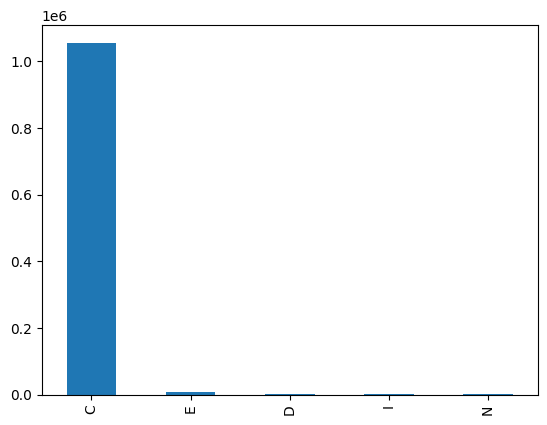

In [6]:
data['labels'].value_counts().plot(kind='bar')

In [10]:
# extract token sequences corrrespoding to their labels
exps = []
current_exp = []
for i, row in data.iterrows():
    if row['labels'] == 'D':
        current_exp.append(row['words'])
    elif current_exp:
        # add the current expression to the dictionary
        exps.append(' '.join(current_exp))
        # reset the current expression
        current_exp = []
    else:
        continue

print(exps)

        
            

['thought', 'thought', 'thought', 'thought', 'hypothesized', 'thought', 'thought', 'notion', 'postulate', 'putative', 'view', 'unexpected', 'believed', 'considered', 'thought', 'putative', 'thought', 'thought', 'putative', 'thought', 'thought', 'thought', 'putative', 'believed', 'believed', 'thought', 'believed', 'hypothesized', 'thought', 'believed', 'hypothesis', 'postulated', 'theoretical', 'putative', 'thought', 'hypothesis', 'hypothesize', 'hypothesis', 'thought', 'hypothesize', 'putative', 'putative', 'notion', 'hypothesized', 'prediction', 'thought', 'putative', 'hypothesize', 'predicts', 'putative', 'hypothesis', 'hypothesized', 'putative', 'putative', 'putative', 'assume', 'putative', 'considered', 'predicted', 'hypothesized', 'hypothesized', 'postulated', 'hypothesis', 'putative', 'believe', 'presumed', 'putative', 'putative', 'considered', 'thought', 'hypothesized', 'putative', 'hypothesis', 'hypothesis', 'hypothesis', 'expected', 'hypothesis', 'putative', 'putative', 'putat